# Daniel Bairamian 260669560 
## ECSE 415 Computer Vision
### Image Filtering Assignment 1

In [1]:
# defining imports
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1. Thresholding

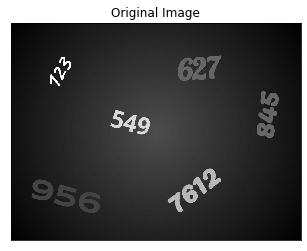

In [2]:
# load image
image_path = "numbers.jpg"
img = cv2.imread(image_path)

# convert image to greyscale
img_gscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# get image dimensions
HEIGHT, WIDTH = img_gscale.shape

# show original image        
plt.title("Original Image")

# remove plot ticks
plt.xticks([]), plt.yticks([])

plt.imshow(img_gscale, cmap="gray")
plt.show()

# 1.1

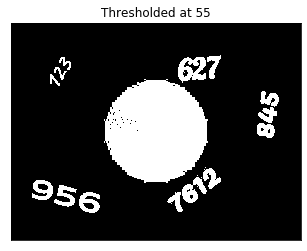

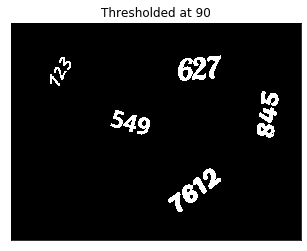

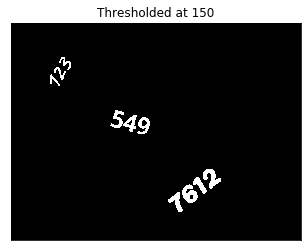

In [3]:
# list of thresholds
image_thresholds = [55, 90, 150]

# threshold images
_ , output0 = cv2.threshold(img_gscale, image_thresholds[0], 255, cv2.THRESH_BINARY)
_ , output1 = cv2.threshold(img_gscale, image_thresholds[1], 255, cv2.THRESH_BINARY)
_ , output2 = cv2.threshold(img_gscale, image_thresholds[2], 255, cv2.THRESH_BINARY)

# display images
plt.imshow(output0, cmap="gray")
plt.title("Thresholded at 55"), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(output1, cmap="gray")
plt.title("Thresholded at 90"), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(output2, cmap="gray")
plt.title("Thresholded at 150"), plt.xticks([]), plt.yticks([])
plt.show()


# 1.2

For the threshold at 55, we can see 5 numbers: 123, 627, 845, 956, and 7612. However technically, all 6 numbers are segmented

The number 549 is also segmented, however it's not possible to see it since the entire circle around the center of the image is considered as foreground, and covers the number 549. This is due to the low threshold, since in the original image we can see this circle, which has a very low brightness compared to the number 549. 

We can also observe that the numbers for this threshold value are very noisy, especially the numbers that are close to the center (7612 and 627). This is because they have a small overlap with the outside of the center circle.




For the threshold at 90, we can also see 5 numbers: 123, 627, 549, 7612, 845. (Every number except 956). In this case, we have 5 segmented numbers. 

We can see for this threshold value that the bright circle in the middle is completely ignored, and we can now see the number 549 which was in the previous case, completely covered. However we lost the number 956, which was clearly visible in the previous threshold.

For the threshold at 150, we can only see 3 numbers: 123, 549, and 7612. These are the brightest numbers of the original image, which is an expected result for the highest threshold value out of the three. Out of the original 6 numbers, this threshold value was only able to segment 3 numbers.

# 1.3

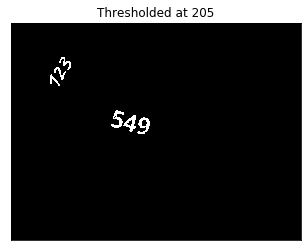

In [4]:
# threshold images
HYPERPARAM = 205
_ , output_hyperparameter = cv2.threshold(img_gscale, HYPERPARAM, 255, cv2.THRESH_BINARY)

# display images
plt.imshow(output_hyperparameter, cmap="gray")
plt.title("Thresholded at " + str(HYPERPARAM)), plt.xticks([]), plt.yticks([])
plt.show()

A threshold value of 205 segments only the numebrs 123 and 549.

# 2. Filtering
## 2.1 Denoising

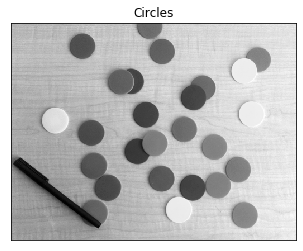

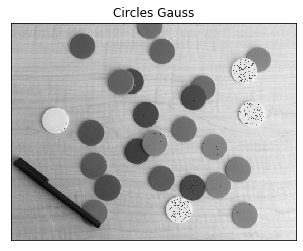

In [5]:
# load images
image_path = "Circles.png"
img = cv2.imread(image_path)

image_path2 = "Circles_gauss.png"
img2 = cv2.imread(image_path2)


# convert image to greyscale
img_gscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gscale2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# show original image        
plt.title("Circles")
# remove plot ticks
plt.xticks([]), plt.yticks([])
plt.imshow(img_gscale, cmap="gray")
plt.show()


# show original image        
plt.title("Circles Gauss")
# remove plot ticks
plt.xticks([]), plt.yticks([])
plt.imshow(img_gscale2, cmap="gray")
plt.show()

# 2.1.1

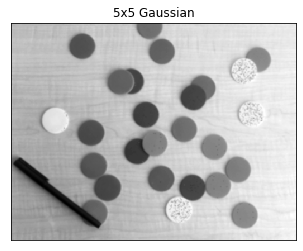

In [6]:
# 5x5 Gaussian Blur
img_fivexfive_gauss = cv2.GaussianBlur(img_gscale2, (5,5), 0)

# plot the result
plt.title("5x5 Gaussian")
plt.xticks([]), plt.yticks([])
plt.imshow(img_fivexfive_gauss, cmap="gray")
plt.show()

# 2.1.2

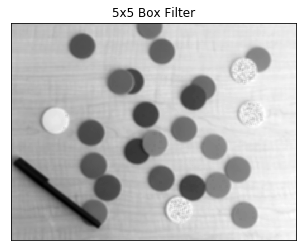

In [7]:
# 5x5 Box Filter
img_fivexfive_box = cv2.blur(img_gscale2, (5,5))

# plot the result
plt.title("5x5 Box Filter")
plt.xticks([]), plt.yticks([])
plt.imshow(img_fivexfive_box, cmap="gray")
plt.show()

# 2.1.3

In [8]:
# PSNR of Gaussian - Original
PSNR_Gauss5 = cv2.PSNR(img_gscale, img_fivexfive_gauss)
print("Original - Gaussian 5x5 PSNR: " , PSNR_Gauss5)

# PSNR of Box - Original
PSNR_Box5 = cv2.PSNR(img_gscale, img_fivexfive_box)
print("Original - Box 5x5 PSNR: " , PSNR_Box5)

Original - Gaussian 5x5 PSNR:  34.458192893218545
Original - Box 5x5 PSNR:  32.643529261342564


The higher the PSNR, the better the quality. From the two PSNR we just computed, the Gaussian filter gives the superior result

# 2.1.4

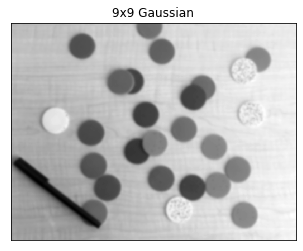

Original - Gaussian 9x9 PSNR:  32.680976875127186


In [9]:
# 9x9 Gaussian Blur
img_ninexnine_gauss = cv2.GaussianBlur(img_gscale2, (9,9), 0)

# plot the result
plt.title("9x9 Gaussian")
plt.xticks([]), plt.yticks([])
plt.imshow(img_ninexnine_gauss, cmap="gray")
plt.show()

# PSNR of Gaussian - Original
PSNR_Gauss9 = cv2.PSNR(img_gscale, img_ninexnine_gauss)
print("Original - Gaussian 9x9 PSNR: " , PSNR_Gauss9)

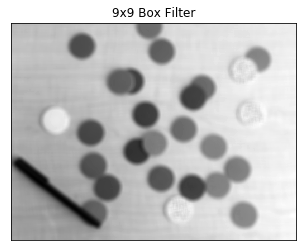

Original - Box 9x9 PSNR:  29.70314121830228


In [10]:
# 9x9 Box Filter
img_ninexnine_box = cv2.blur(img_gscale2, (9,9))

# plot the result
plt.title("9x9 Box Filter")
plt.xticks([]), plt.yticks([])
plt.imshow(img_ninexnine_box, cmap="gray")
plt.show()

# PSNR of Box - Original
PSNR_Box9 = cv2.PSNR(img_gscale, img_ninexnine_box)
print("Original - Box 9x9 PSNR: " , PSNR_Box9)

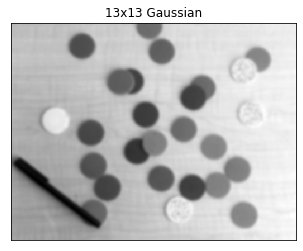

Original - Gaussian 13x13 PSNR:  31.195698604222404


In [11]:
# 13x13 Gaussian Blur
img_ttxtt_gauss = cv2.GaussianBlur(img_gscale2, (13,13), 0)

# plot the result
plt.title("13x13 Gaussian")
plt.xticks([]), plt.yticks([])
plt.imshow(img_ttxtt_gauss, cmap="gray")
plt.show()

# PSNR of Gaussian - Original
PSNR_Gauss13 = cv2.PSNR(img_gscale, img_ttxtt_gauss)
print("Original - Gaussian 13x13 PSNR: " , PSNR_Gauss13)

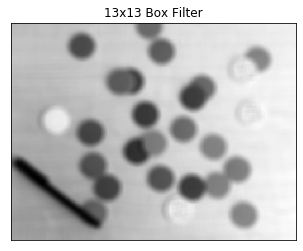

Original - Box 13x13 PSNR:  27.76483091423706


In [12]:
# 13x13 Box Filter
img_ttxtt_box = cv2.blur(img_gscale2, (13,13))

# plot the result
plt.title("13x13 Box Filter")
plt.xticks([]), plt.yticks([])
plt.imshow(img_ttxtt_box, cmap="gray")
plt.show()

# PSNR of Box - Original
PSNR_Box13 = cv2.PSNR(img_gscale, img_ttxtt_box)
print("Original - Box 13x13 PSNR: " , PSNR_Box13)

For both the Gaussian and Box filter, increasing the kernel size to 9x9 decreased the PSNR. Similarily, going to 13x13 also further decreased the PSNR.

The PSNR is an indicator of image quality, and this decrease can be seen visually. For both filters, every time we increased the filter size, the image became more blurry. 

Although both filters suffer from the increase in kernel size, an observation can be made on the decrease in quality, as it seems to be more prominent for the Box filter than the Gaussian filter. 

In [13]:
# function that computes the % change between two numbers
def delta_calc(original, current):
    delta = current - original
    percent = ( delta / original ) * 100
    return percent

Gauss_Delta_PSNR_59 = delta_calc(PSNR_Gauss5, PSNR_Gauss9)
Gauss_Delta_PSNR_513 = delta_calc(PSNR_Gauss5, PSNR_Gauss13)

Box_Delta_PSNR_59 = delta_calc(PSNR_Box5, PSNR_Box9)
Box_Delta_PSNR_513 = delta_calc(PSNR_Box5, PSNR_Box13)

print("Gauss PSNR loss analysis")
print("PSNR Change from 5x5 to 9x9 for Gauss: " , Gauss_Delta_PSNR_59, "%")
print("PSNR Change from 5x5 to 13x13 for Gauss: " , Gauss_Delta_PSNR_513, "%")

print("\nBox PSNR loss analysis")
print("PSNR Change from 5x5 to 9x9 for Box: ", Box_Delta_PSNR_59, "%")
print("PSNR Change from 5x5 to 13x13 for Box: ", Box_Delta_PSNR_513, "%")

Gauss PSNR loss analysis
PSNR Change from 5x5 to 9x9 for Gauss:  -5.15760075868958 %
PSNR Change from 5x5 to 13x13 for Gauss:  -9.467978483683652 %

Box PSNR loss analysis
PSNR Change from 5x5 to 9x9 for Box:  -9.007567838329226 %
PSNR Change from 5x5 to 13x13 for Box:  -14.945376488083978 %


As we can see, not only is the PSNR of the gaussian filter higher than the box filter's, but it also retains more information of the image as the kernel size increases.

# 2.1.5

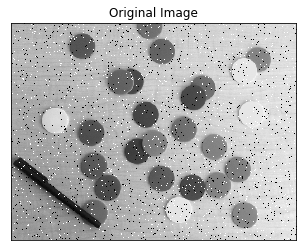

In [14]:
# load image
image_path_sp = "Circles_sp.png"
img_sp = cv2.imread(image_path_sp)

# convert image to greyscale
img_gscale2 = cv2.cvtColor(img_sp, cv2.COLOR_BGR2GRAY)

# show original image        
plt.title("Original Image")

# remove plot ticks
plt.xticks([]), plt.yticks([])

plt.imshow(img_gscale2, cmap="gray")
plt.show()

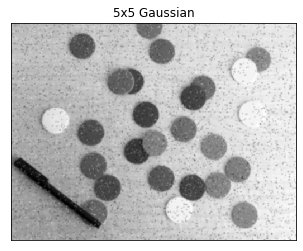

In [15]:
# 5x5 Gaussian Blur
img_fivexfive_gauss = cv2.GaussianBlur(img_gscale2, (5,5), 0)

# plot the result
plt.title("5x5 Gaussian")
plt.xticks([]), plt.yticks([])
plt.imshow(img_fivexfive_gauss, cmap="gray")
plt.show()

# 2.1.6

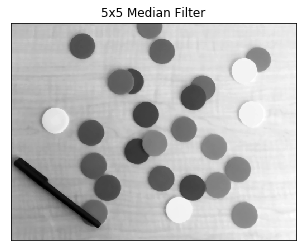

In [16]:
# 5x5 Median Filter
img_fivexfive_md = cv2.medianBlur(img_gscale2, 5)

# plot the result
plt.title("5x5 Median Filter")
plt.xticks([]), plt.yticks([])
plt.imshow(img_fivexfive_md, cmap="gray")
plt.show()

# 2.1.7

In [17]:
# PSNR of Gaussian - Original
PSNR_Gauss5 = cv2.PSNR(img_gscale, img_fivexfive_gauss)
print("Original - Gaussian 5x5 PSNR: " , PSNR_Gauss5)

# PSNR of Median - Original
PSNR_MD5 = cv2.PSNR(img_gscale, img_fivexfive_md)
print("Original - Median 5x5 PSNR: " , PSNR_MD5)

Original - Gaussian 5x5 PSNR:  28.953422699729146
Original - Median 5x5 PSNR:  37.33347209006007


The higher the PSNR, the better the quality. From the two PSNR we just computed, the Median filter gives the superior result

# 2.1.8

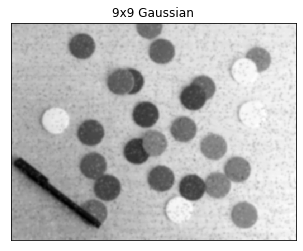

Original - Gaussian 9x9 PSNR:  30.634427033633926


In [18]:
# 9x9 Gaussian Blur
img_ninexnine_gauss = cv2.GaussianBlur(img_gscale2, (9,9), 0)

# plot the result
plt.title("9x9 Gaussian")
plt.xticks([]), plt.yticks([])
plt.imshow(img_ninexnine_gauss, cmap="gray")
plt.show()

# PSNR of Gaussian - Original
PSNR_Gauss9 = cv2.PSNR(img_gscale, img_ninexnine_gauss)
print("Original - Gaussian 9x9 PSNR: " , PSNR_Gauss9)

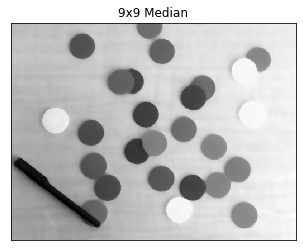

Original - Median 9x9 PSNR:  34.609276164579434


In [19]:
# 9x9 Median Blur
img_ninexnine_md = cv2.medianBlur(img_gscale2, 9)

# plot the result
plt.title("9x9 Median")
plt.xticks([]), plt.yticks([])
plt.imshow(img_ninexnine_md, cmap="gray")
plt.show()

# PSNR of Median - Original
PSNR_MD9 = cv2.PSNR(img_gscale, img_ninexnine_md)
print("Original - Median 9x9 PSNR: " , PSNR_MD9)

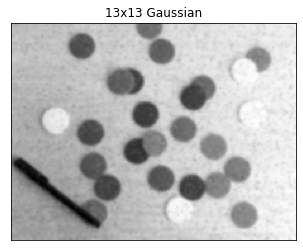

Original - Gaussian 9x9 PSNR:  30.253358871669704


In [20]:
# 13x13 Gaussian Blur
img_ttxtt_gauss = cv2.GaussianBlur(img_gscale2, (13,13), 0)

# plot the result
plt.title("13x13 Gaussian")
plt.xticks([]), plt.yticks([])
plt.imshow(img_ttxtt_gauss, cmap="gray")
plt.show()

# PSNR of Gaussian - Original
PSNR_Gauss13 = cv2.PSNR(img_gscale, img_ttxtt_gauss)
print("Original - Gaussian 9x9 PSNR: " , PSNR_Gauss13)

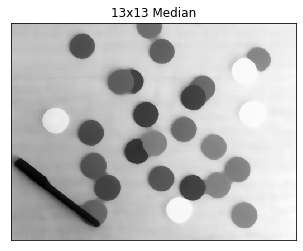

Original - Median 13x13 PSNR:  32.56282978020951


In [21]:
# 13x13 Median Blur
img_ttxtt_md = cv2.medianBlur(img_gscale2, 13)

# plot the result
plt.title("13x13 Median")
plt.xticks([]), plt.yticks([])
plt.imshow(img_ttxtt_md, cmap="gray")
plt.show()

# PSNR of Median - Original
PSNR_MD13 = cv2.PSNR(img_gscale, img_ttxtt_md)
print("Original - Median 13x13 PSNR: " , PSNR_MD13)

Unlike the results of the first image, the gaussian filter actually performs better when the kernel size increases from 5x5 to 9x9, according to the increase of PSNR. Visually we can see that the salt and pepper noise is less defined when applying the 9x9 filter compared to the 5x5. Its performance however seems to stagnate when applying the 13x13 filter, as visually there doesn't seem to be much of a difference when compared to the 9x9 filter, and the very little change in PSNR reflects this performance limitation

The median filter seems to perform worse when the kernel size increases. Going from 5x5 to 9x9 saw a drop in the PSNR, as well as going from 9x9 to 13x13. This performance hit can also be seen visually, as some blur starts to form especially in the regions betwen two objects. 


Even though the median filter suffers when increasing the kernel size, its worse performance still beats the gaussian filter's best performance, which clearly shows that it is the superior filter when it comes to denoising salt and pepper noise

In [22]:
Gauss_Delta_PSNR_59 = delta_calc(PSNR_Gauss5, PSNR_Gauss9)
Gauss_Delta_PSNR_513 = delta_calc(PSNR_Gauss5, PSNR_Gauss13)

MD_Delta_PSNR_59 = delta_calc(PSNR_MD5, PSNR_MD9)
MD_Delta_PSNR_513 = delta_calc(PSNR_MD5, PSNR_MD13)

print("Gauss PSNR loss analysis")
print("PSNR Change from 5x5 to 9x9 for Gauss: " , Gauss_Delta_PSNR_59, "%")
print("PSNR Change from 5x5 to 13x13 for Gauss: " , Gauss_Delta_PSNR_513, "%")

print("\nMedian PSNR loss analysis")
print("PSNR Change from 5x5 to 9x9 for Median: ", MD_Delta_PSNR_59, "%")
print("PSNR Change from 5x5 to 13x13 for Median: ", MD_Delta_PSNR_513, "%")

Gauss PSNR loss analysis
PSNR Change from 5x5 to 9x9 for Gauss:  5.805891591257383 %
PSNR Change from 5x5 to 13x13 for Gauss:  4.489749572691173 %

Median PSNR loss analysis
PSNR Change from 5x5 to 9x9 for Median:  -7.296926251351652 %
PSNR Change from 5x5 to 13x13 for Median:  -12.77845869342736 %


# 2.2 Sharpening

# 2.1

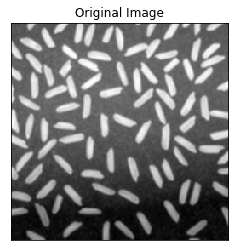

In [23]:
# load image
image_path = "rice.png"
img = cv2.imread(image_path)

# convert image to greyscale
img_gscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# get image dimensions
HEIGHT, WIDTH = img_gscale.shape

# show original image        
plt.title("Original Image")

# remove plot ticks
plt.xticks([]), plt.yticks([])

plt.imshow(img_gscale, cmap="gray")
plt.show()

# Box Filter

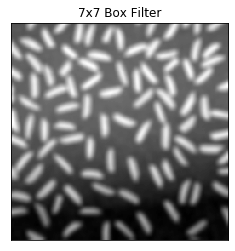

In [24]:
# 7x7 Box Filter
img_7x7_box = cv2.blur(img_gscale, (7,7))

# plot the result
plt.title("7x7 Box Filter")
plt.xticks([]), plt.yticks([])
plt.imshow(img_7x7_box, cmap="gray")
plt.show()

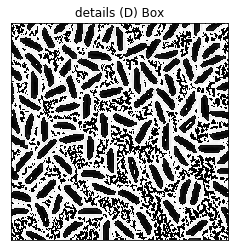

In [25]:
details_D_box = img_gscale - img_7x7_box

# plot the result
plt.title("details (D) Box")
plt.xticks([]), plt.yticks([])
plt.imshow(details_D_box, cmap="gray")
plt.show()

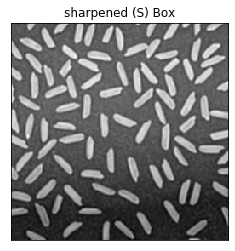

In [26]:
sharpened_S_Box = img_gscale + details_D_box

# plot the result
plt.title("sharpened (S) Box")
plt.xticks([]), plt.yticks([])
plt.imshow(sharpened_S_Box, cmap="gray")
plt.show()

# Gaussian Filter

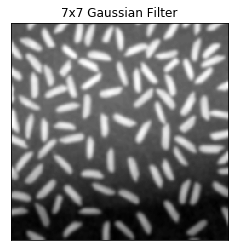

In [27]:
# 7x7 Gaussian Filter
img_7x7_gauss = cv2.GaussianBlur(img_gscale, (7,7), 0)

# plot the result
plt.title("7x7 Gaussian Filter")
plt.xticks([]), plt.yticks([])
plt.imshow(img_7x7_gauss, cmap="gray")
plt.show()

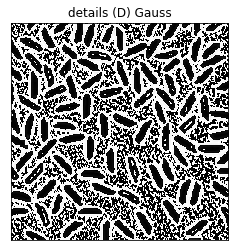

In [28]:
details_D_gauss = img_gscale - img_7x7_gauss

# plot the result
plt.title("details (D) Gauss")
plt.xticks([]), plt.yticks([])
plt.imshow(details_D_gauss, cmap="gray")
plt.show()

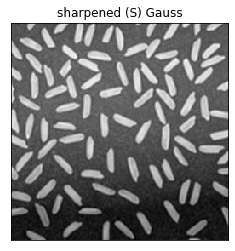

In [29]:
sharpened_S_gauss = img_gscale + details_D_gauss

# plot the result
plt.title("sharpened (S) Gauss")
plt.xticks([]), plt.yticks([])
plt.imshow(sharpened_S_gauss, cmap="gray")
plt.show()

The quality of the sharpening effect will depend on the quality of our details, which itself depends on the performance of our blur. From the previous section of this assignment, we saw that the gaussian filter performed better than the box filter when it came to blurring the image. This performance was measured both visually, and through the PSNR indicator. 

In the case of sharpening, since we do not have a ground truth to compare to, we cannot use the PSNR to evaluate our result, so we have to rely on visual assessment.

By performing a quick A/B test (layering two images exactly on top of each other and quickly changing between the two), we can observe that the gaussian sharpened image has some more defined edges than the box filter's sharpened image.

It also appears that the backround in the gaussian filter's result is less bright, which is an ideal result.

# 3 Edge Detection
## 3.1 Sobel Edge Detector

# 3.1.1

X and Y direction sobel for our 3 images

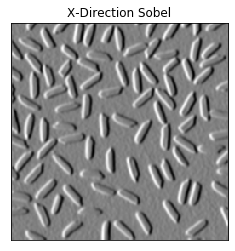

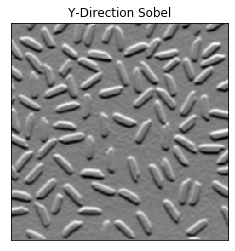

In [30]:
# Sobel Edge Detector on unsharpened image
U_Sobel_X =  cv2.Sobel(img_gscale, cv2.CV_64F, 1, 0, ksize=5)
U_Sobel_Y =  cv2.Sobel(img_gscale, cv2.CV_64F, 0, 1, ksize=5)

# plot the result
plt.title("X-Direction Sobel")
plt.xticks([]), plt.yticks([])
plt.imshow(U_Sobel_X, cmap="gray")
plt.show()

# plot the result
plt.title("Y-Direction Sobel")
plt.xticks([]), plt.yticks([])
plt.imshow(U_Sobel_Y, cmap="gray")
plt.show()

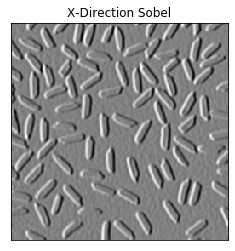

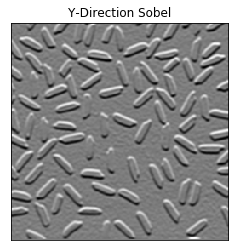

In [31]:
# Sobel Edge Detector on Box Sharpened image
Box_Sobel_X =  cv2.Sobel(sharpened_S_Box, cv2.CV_64F, 1, 0, ksize=5)
Box_Sobel_Y =  cv2.Sobel(sharpened_S_Box, cv2.CV_64F, 0, 1, ksize=5)

# plot the result
plt.title("X-Direction Sobel")
plt.xticks([]), plt.yticks([])
plt.imshow(Box_Sobel_X, cmap="gray")
plt.show()

# plot the result
plt.title("Y-Direction Sobel")
plt.xticks([]), plt.yticks([])
plt.imshow(Box_Sobel_Y, cmap="gray")
plt.show()

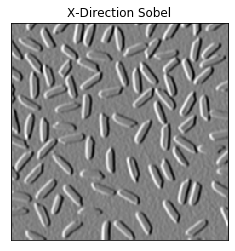

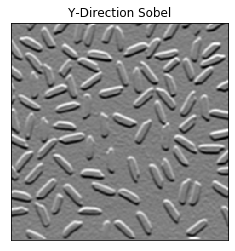

In [32]:
# Sobel Edge Detector on Box Sharpened image
G_Sobel_X =  cv2.Sobel(sharpened_S_gauss, cv2.CV_64F, 1, 0, ksize=5)
G_Sobel_Y =  cv2.Sobel(sharpened_S_gauss, cv2.CV_64F, 0, 1, ksize=5)

# plot the result
plt.title("X-Direction Sobel")
plt.xticks([]), plt.yticks([])
plt.imshow(G_Sobel_X, cmap="gray")
plt.show()

# plot the result
plt.title("Y-Direction Sobel")
plt.xticks([]), plt.yticks([])
plt.imshow(G_Sobel_Y, cmap="gray")
plt.show()

Magnitude of our sobel operator on our 3 images (thresholded at 200 and 800)

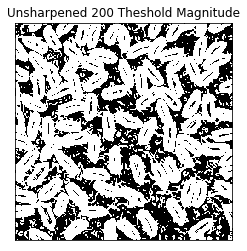

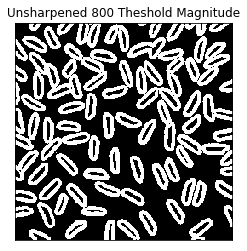

In [33]:
# Unsharpened Image
U_mag = cv2.magnitude(U_Sobel_X, U_Sobel_Y)

_ , U_mag_200 = cv2.threshold(U_mag, 200, 255, cv2.THRESH_BINARY)
_ , U_mag_800 = cv2.threshold(U_mag, 800, 255, cv2.THRESH_BINARY)

# plot the result
plt.title("Unsharpened 200 Theshold Magnitude")
plt.xticks([]), plt.yticks([])
plt.imshow(U_mag_200, cmap="gray")
plt.show()

# plot the result
plt.title("Unsharpened 800 Theshold Magnitude")
plt.xticks([]), plt.yticks([])
plt.imshow(U_mag_800, cmap="gray")
plt.show()

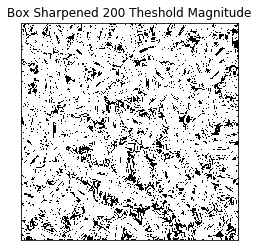

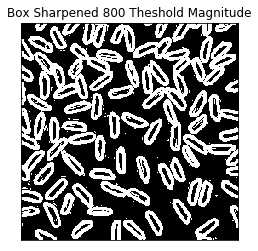

In [34]:
# Box sharpened Image
B_mag = cv2.magnitude(Box_Sobel_X, Box_Sobel_Y)

_ , B_mag_200 = cv2.threshold(B_mag, 200, 255, cv2.THRESH_BINARY)
_ , B_mag_800 = cv2.threshold(B_mag, 800, 255, cv2.THRESH_BINARY)

# plot the result
plt.title("Box Sharpened 200 Theshold Magnitude")
plt.xticks([]), plt.yticks([])
plt.imshow(B_mag_200, cmap="gray")
plt.show()

# plot the result
plt.title("Box Sharpened 800 Theshold Magnitude")
plt.xticks([]), plt.yticks([])
plt.imshow(B_mag_800, cmap="gray")
plt.show()

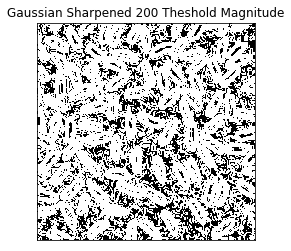

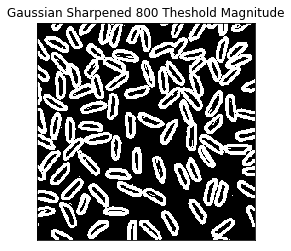

In [35]:
# Gaussian sharpened Image
G_mag = cv2.magnitude(G_Sobel_X, G_Sobel_Y)

_ , G_mag_200 = cv2.threshold(G_mag, 200, 255, cv2.THRESH_BINARY)
_ , G_mag_800 = cv2.threshold(G_mag, 800, 255, cv2.THRESH_BINARY)

# plot the result
plt.title("Gaussian Sharpened 200 Theshold Magnitude")
plt.xticks([]), plt.yticks([])
plt.imshow(G_mag_200, cmap="gray")
plt.show()

# plot the result
plt.title("Gaussian Sharpened 800 Theshold Magnitude")
plt.xticks([]), plt.yticks([])
plt.imshow(G_mag_800, cmap="gray")
plt.show()

Sharpening an image prior to doing an edge detection serves as a feature enhancer, which will allow for edge detection to be more effective. Boundaries between objects and their surroundings will be more defined, which facilitate the edge detector's job. Edges will have higher gradiants, which means more rapidly changing values, which can be defined as higher frequency information on a local scale.  

For our three images, the threshold of 800 is clearly the better value, as edges are clearly visible, whereas the 200 threshold result is unusable, being almost completely filled with noise.

# 3.1.2

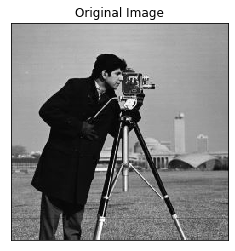

In [36]:
# load image
image_path = "cameraman.jpg"
img = cv2.imread(image_path)

# convert image to greyscale
img_gscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# get image dimensions
HEIGHT, WIDTH = img_gscale.shape

# show original image        
plt.title("Original Image")

# remove plot ticks
plt.xticks([]), plt.yticks([])

plt.imshow(img_gscale, cmap="gray")
plt.show()

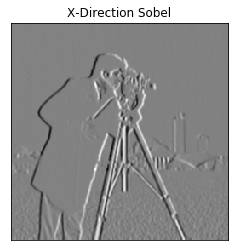

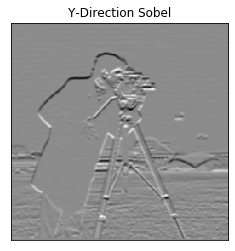

In [37]:
# Sobel Edge Detector on Gaussian Blurred image
I_Sobel_X =  cv2.Sobel(img_gscale, cv2.CV_64F, 1, 0, ksize=5)
I_Sobel_Y =  cv2.Sobel(img_gscale, cv2.CV_64F, 0, 1, ksize=5)

# plot the result
plt.title("X-Direction Sobel")
plt.xticks([]), plt.yticks([])
plt.imshow(I_Sobel_X, cmap="gray")
plt.show()

# plot the result
plt.title("Y-Direction Sobel")
plt.xticks([]), plt.yticks([])
plt.imshow(I_Sobel_Y, cmap="gray")
plt.show()

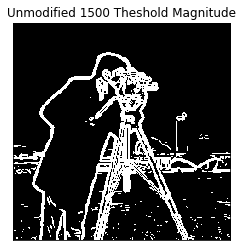

In [38]:
# Unmodified Image
I_mag = cv2.magnitude(I_Sobel_X, I_Sobel_Y)

_ , I_mag_1500 = cv2.threshold(I_mag, 1500, 255, cv2.THRESH_BINARY)

# plot the result
plt.title("Unmodified 1500 Theshold Magnitude")
plt.xticks([]), plt.yticks([])
plt.imshow(I_mag_1500, cmap="gray")
plt.show()

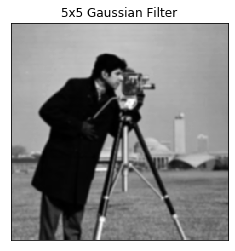

In [39]:
# 5x5 Gaussian Filter
img_5x5_gauss = cv2.GaussianBlur(img_gscale, (5,5), 0)

# plot the result
plt.title("5x5 Gaussian Filter")
plt.xticks([]), plt.yticks([])
plt.imshow(img_5x5_gauss, cmap="gray")
plt.show()

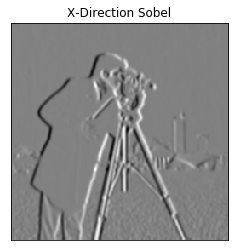

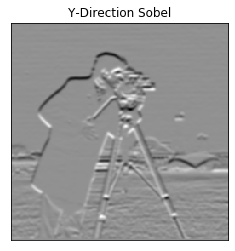

In [40]:
# Sobel Edge Detector on Gaussian Blurred image
G_Sobel_X =  cv2.Sobel(img_5x5_gauss, cv2.CV_64F, 1, 0, ksize=5)
G_Sobel_Y =  cv2.Sobel(img_5x5_gauss, cv2.CV_64F, 0, 1, ksize=5)

# plot the result
plt.title("X-Direction Sobel")
plt.xticks([]), plt.yticks([])
plt.imshow(G_Sobel_X, cmap="gray")
plt.show()

# plot the result
plt.title("Y-Direction Sobel")
plt.xticks([]), plt.yticks([])
plt.imshow(G_Sobel_Y, cmap="gray")
plt.show()

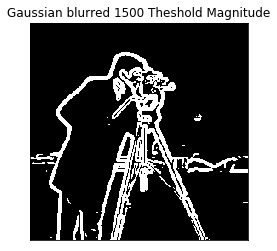

In [41]:
# Gaussian sharpened Image
G_mag = cv2.magnitude(G_Sobel_X, G_Sobel_Y)

_ , G_mag_1500 = cv2.threshold(G_mag, 1500, 255, cv2.THRESH_BINARY)

# plot the result
plt.title("Gaussian blurred 1500 Theshold Magnitude")
plt.xticks([]), plt.yticks([])
plt.imshow(G_mag_1500, cmap="gray")
plt.show()

Unlike sharpening, denoising actually reduce the effectiveness of the edge detection. For the same reason as why sharpening an image was useful, denoising an image blurs edges, smoothing them with their surroundings, which reduces their gradiant value.


From the results of both edge detectors, we can see that the denoised image lost a lot of useful information, especially in the background. However, some of the edges lost might be beneficial for some applications. For example, we can see on the legs of the camera man, that the plies in his pants got caught by the edge detector prior to denoising, but then got ignored after applying the gaussian filter. These edges do not contribute any useful information about the scene, so information loss might not always be bad.

# 3.2

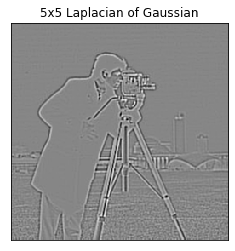

In [42]:
# 5x5 Laplacian operator on the cameraman image
laplacian5 = cv2.Laplacian(img_gscale, cv2.CV_32F, ksize=5)

# plot the result
plt.title("5x5 Laplacian of Gaussian")
plt.xticks([]), plt.yticks([])
plt.imshow(laplacian5, cmap="gray")
plt.show()

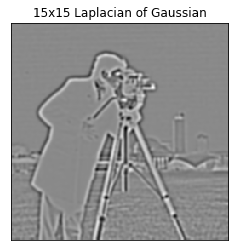

In [43]:
# 15x15 Laplacian operator on the cameraman image
laplacian15 = cv2.Laplacian(img_gscale, cv2.CV_32F, ksize=15)

# plot the result
plt.title("15x15 Laplacian of Gaussian")
plt.xticks([]), plt.yticks([])
plt.imshow(laplacian15, cmap="gray")
plt.show()

For the 5x5 laplacian of gaussian edge detector, we can clearly see well defined, crisp edges. When increasing the kernel size to 15x15, the edge map lost some information, but it is still relatively structurally correct, however the result is less sharp than the 5x5 kernel, which is a clear sign of over-smoothing of the image, due to the increase in kernel size. 

# 3.3 Canny Edge Detection

# 3.3.1

Canny Edge detection 4 main steps:
    
1. Apply a Gaussian filter to smooth the image, then extract the derivates in the X and Y directions
2. Find the magnitude and orientation of the gradient
3. Non-maximum suppresion: check if the pixel is a local maxima along the gradient direction
4. Double-Value Thresholding: apply a low and high threshold value on the image, then use both results to complete edges

# 3.3.2

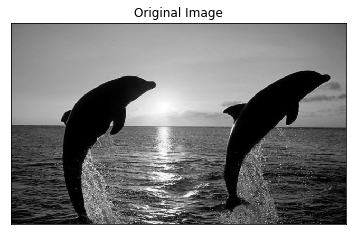

In [44]:
# load image
image_path = "dolphin.jpg"
img = cv2.imread(image_path)

# convert image to greyscale
img_gscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# get image dimensions
HEIGHT, WIDTH = img_gscale.shape

# show original image        
plt.title("Original Image")

# remove plot ticks
plt.xticks([]), plt.yticks([])

plt.imshow(img_gscale, cmap="gray")
plt.show()

In [45]:
def show_images(images, cols , titles):
    
    n_images = len(images)
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        plt.xticks([]), plt.yticks([])
        plt.imshow(image, cmap="gray")
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [46]:
# hyperparameters
K = [5, 9, 13]
L = [10, 30, 50]
H = [100, 150, 200]

images = []
titles = []

for k in K:
    for l in L:
        for h in H:
            blur_img = cv2.GaussianBlur(img_gscale, (k, k), 0)
            canny_res = cv2.Canny(blur_img, l, h)
            images.append(canny_res)
            titles.append("Hyperparam: K: " + str(k)+", L: "+str(l)+", H: "+str(h))

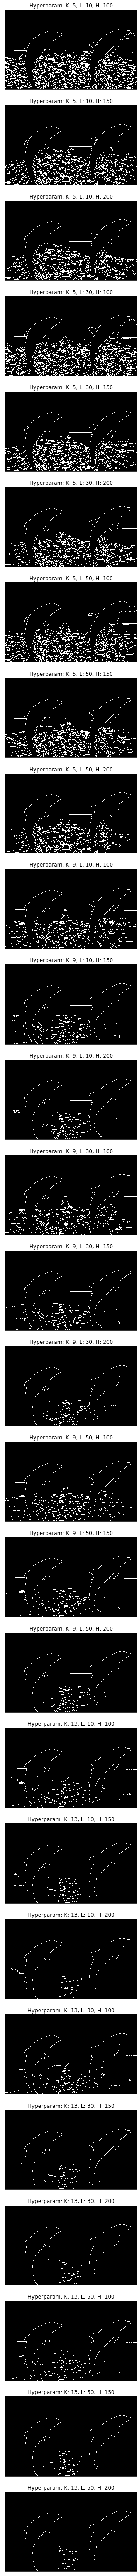

In [47]:
show_images(images, len(images), titles)

# 3.3.3

From the generated images above, we can sense a distinct role for each of the hyperparameters.

the hyperparameter K, which determines the size of the kernel of the gaussian, seems to have the most impact on the background of the image, where the higher this value, the more we lose on the edges caused by the ripples in the water. This behaviour is to be expected, as the edges on the water represent high frequency information, which is primairly eliminated by blurs. 

the hyperparameters L and H seem to have a relationship when it comes to the number of edges detected. Since they represent the Low and High thresholds of the Canny Edge detector, this behaviour is also to be expected.

In order worlds, the hyperparameter K controls how many edges we keep from our original scene, the higher the K the fewer the edges essentially, prioritizing the protection of low frequency, well defined edges. Whereas L and H together determine how strong should a remaining edge be in order to be considered.

# 3.3.4

In [48]:
# This code was used to generate a lot of images (~100) for hyperparameter tuning
# in order to find a combination that satisfies the problem
# I decided to keep it as a reference as to how I got my results for 3.3.4
# DO NOT uncomment, unless for some reason you enjoy having memory overflows :)


# # hyperparameters
# K = np.arange(13, 30, 8)
# L = np.arange(10, 100, 15)
# H = np.arange(150, 250, 20)

# images = []
# titles = []

# for k in K:
#     for l in L:
#         for h in H:
#             blur_img = cv2.GaussianBlur(img_gscale, (k, k), 0)
#             canny_res = cv2.Canny(blur_img, l, h)
#             images.append(canny_res)
#             titles.append("Hyperparam: K: " + str(k)+", L: "+str(l)+", H: "+str(h))

# print(len(images))
# show_images(images, len(images), titles)

After doing some hyperparameter tuning with the code above, and generating a lot of images, I found that the triplet (17, 40, 190) only detects the edges of the dolphins.

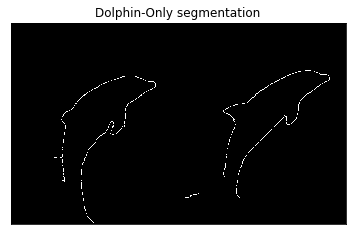

In [49]:
blur_img = cv2.GaussianBlur(img_gscale, (17, 17), 0)
canny_res = cv2.Canny(blur_img, 40, 190)

# plot the result
plt.title("Dolphin-Only segmentation")
plt.xticks([]), plt.yticks([])
plt.imshow(canny_res, cmap="gray")
plt.show()